In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Lecture 21 Time series analysis 1, Frequency Domain and Periodograms

### In this lecture we will:

- learn basic concepts of data types
- properties of time series
- the concept of a spectrum
- periodograms, power spectrum density

### 1. Introduction to Time Series

#### Definition
- “the data is a time series in the form of a sequence of quantitative observations about a system or process and made at successive points in time. Commonly, the points in time are equally spaced. ”

- Usually time series data is equally spaced in time (if not, then resamplings are needed)

#### Examples:

- gross domestic product
- sales volumes 
- stock prices
- weather attributes 

when recorded over a time spread of several years, months, days, hours, and so on.

#### Why Time Series Analysis?

Time series analysis applies different statistical methods to explore and model the internal structures of the time series data such as periodicity, trends, seasonal fluctuations, cyclical behavior, and irregular changes.

### 2. Different types of data

Data scientists come across many different types of data in their analytics projects. Most data commonly found in academic and industrial projects can be broadly classified into the following categories:

- Cross-sectional data
- Time series data
- Panel data 

Understanding what type of data is needed to solve a problem and what type of data can be obtained from available sources is important for formulating the problem and choosing the right methodology for analysis.

#### 2.1 Cross-sectional data

- Cross-sectional data or cross-section of a population is obtained by taking observations from multiple individuals **at the same point in time**. \
- Cross-sectional data can comprise of observations taken at different points in time, however, in such cases time itself **does not** play any significant role in the analysis.
- Let's take a look at the example we've used in previous lectures:

Text(0.5, 1.0, 'GDP distribution')

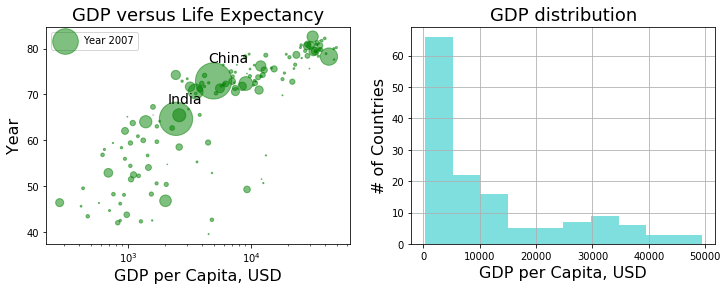

In [2]:
file = "../Datasets/gdp_data.txt"
gdp = pd.read_csv(file)

gdpPC = gdp.gdpPercap[gdp.year==2007] # select year 2007
life = gdp['lifeExp'][gdp.year==2007]
pop = gdp["pop"][gdp.year==2007]/1000000

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(gdpPC,life,pop,alpha = 0.5,c='g',label='Year 2007')
plt.xlabel('GDP per Capita, USD',fontsize=16)
plt.ylabel('Year',fontsize=16)
plt.title('GDP versus Life Expectancy',fontsize=18)
plt.xscale('log')
plt.text(4500,77,'China',fontsize=14)
plt.text(2100,68,'India',fontsize=14)
plt.legend()

plt.subplot(1,2,2)
gdp.gdpPercap[gdp.year==2007].hist(color='c',alpha = 0.5)
plt.xlabel('GDP per Capita, USD',fontsize=16)
plt.ylabel('# of Countries',fontsize=16)
plt.title('GDP distribution',fontsize=18)

In the above example, we are only showing all the GDP, life expectancy, population etc. data for year 2007, and there's no comparisons between different years, which means time does not play an important role in interpreting the data (yet). So they are cross-sectional data.

#### 2.2 Time series data

The example of cross-sectional data discussed earlier is from the year 2010 only. However, instead if we consider only one country, for example China:

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106
288    400.448611
289    575.987001
290    487.674018
291    612.705693
292    676.900092
Name: gdpPercap, dtype: float64


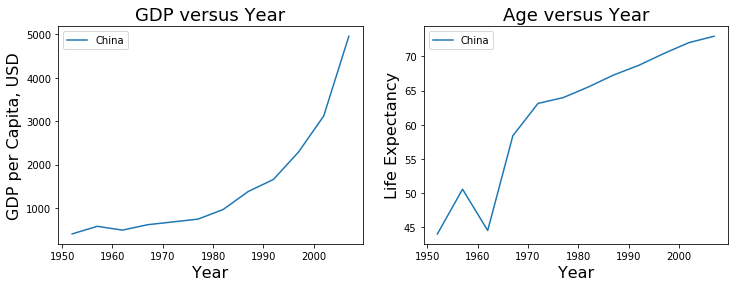

In [3]:
file = "../Datasets/gdp_data.txt"
gdp = pd.read_csv(file)

gdp.set_index('year')

print(gdp.head())

gdp_C = gdp.gdpPercap[gdp.country=='China'] # select year 2007
lif_C = gdp.lifeExp[gdp.country=='China'] # select year 2007
year_C = gdp['year'][gdp.country=='China']
#pop = gdp["pop"][gdp.year==2007]/1000000

print(gdp_C.head())

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(year_C,gdp_C,label='China')
plt.xlabel('Year',fontsize=16)
plt.ylabel('GDP per Capita, USD',fontsize=16)
plt.title('GDP versus Year',fontsize=18)
plt.legend()

plt.subplot(1,2,2)
plt.plot(year_C,lif_C,label='China')
plt.xlabel('Year',fontsize=16)
plt.ylabel('Life Expectancy',fontsize=16)
plt.title('Age versus Year',fontsize=18)
plt.legend()

The internal structures of time series data require special formulation and techniques for its analysis. These techniques will be covered in the following lecture with case studies and implementation of working code in Python.

#### 2.3 Panel data

So far, we have seen data taken from multiple individuals but at one point in time (cross-sectional) or taken from an individual entity but over multiple points in time (time series). However, if we observe _multiple entities over multiple points in time_ we get a **panel data** also known as **longitudinal** data. Extending our earlier example about the military expenditure, let us now consider the "BRICS" countries over the same period of 1952-2007. The resulting data will be a panel dataset. The figure given below illustrates the panel data in this scenario.

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


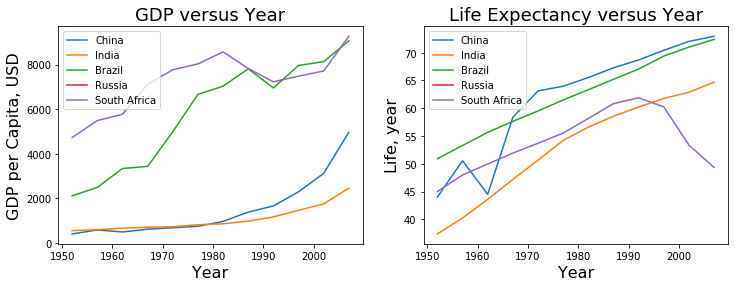

In [4]:
file = "../Datasets/gdp_data.txt"
gdp = pd.read_csv(file)

gdp.set_index('year')

print(gdp.head())

contries = ['China','India','Brazil','Russia','South Africa']
col = ['r','g','b','k','c']

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)

for i,j in zip(contries, col):
    gdp_C = gdp['gdpPercap'][gdp.country==i] # select year 2007
    year_C = gdp['year'][gdp.country==i]
    plt.plot(year_C,gdp_C,label=i)

plt.xlabel('Year',fontsize=16)
plt.ylabel('GDP per Capita, USD',fontsize=16)
plt.title('GDP versus Year',fontsize=18)
plt.legend()

plt.subplot(1,2,2)

for i,j in zip(contries, col):
    lif_C = gdp['lifeExp'][gdp.country==i] # select year 2007
    year_C = gdp['year'][gdp.country==i]
    plt.plot(year_C,lif_C,label=i)

plt.xlabel('Year',fontsize=16)
plt.ylabel('Life, year',fontsize=16)
plt.title('Life Expectancy versus Year',fontsize=18)
plt.legend()

### 3. Spectrum and Periodogram  

#### 3.1 Time Domain

In time series data, the variation of a particular variable is respect to time (in years, months, days, hours,minutes, seconds, etc.). In Signal processing, we call these data points are defined in the **time domain**, which means that in a line plot, the x-axis is for time. 

For example, the following signal is a sine wave in the time domain:

$$y(t)=\sin(2\pi t)$$

Text(0, 0.5, 'Signal')

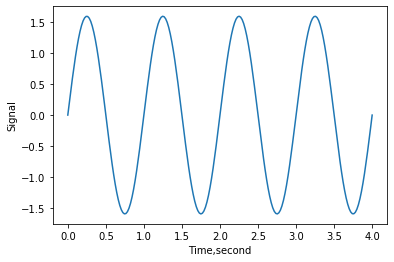

In [5]:
t = np.linspace(0,4,200) # time, between 0 and 4 seconds, sampled by 200 data points
#x = 16*np.sin(t)**3
#y = 13*np.cos(t) - 5*np.cos(2*t) -2*np.cos(3*t) - np.cos(4*t)
y = 1.6*np.sin(2*np.pi*t) # time series y(t)
plt.plot(t,y)
plt.xlabel('Time,second')
plt.ylabel('Signal')

In [2]:
plt.stem(t,y)

NameError: name 't' is not defined

#### 3.2 Frequency Domain

The above signal $y(t)=\sin(2\pi t)$ is a very simple signal: it shows sinusoid variations with respect to time. In the signal $y(t)$, the magnitude of the sinusoid wave is 1.6, and the periodicity of the sinusoidal wave $T$ is simply 1 second, corresponding to a **frequency** $f=1/T=1$ Hz. Now let's make another simple (almost trivial) plot showing the relationship between the wave frequency (x-axis) and magnitude (y-axis):

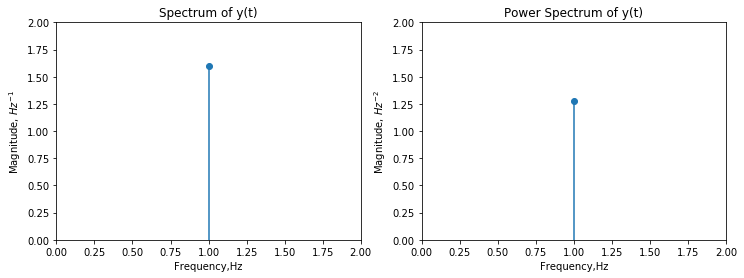

In [10]:
f = np.array([1]) # frequency
Mg = np.array([1.6]) #magnitude of the component

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.stem(f,Mg) # frequency spectrum
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude, $Hz^{-1}$')
plt.title('Spectrum of y(t)')
plt.xlim([0,2])
plt.ylim([0,2])

plt.subplot(1,2,2)
plt.stem(f,0.5*Mg**2) # power specturm
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude, $Hz^{-2}$')
plt.title('Power Spectrum of y(t)')
plt.xlim([0,2])
plt.ylim([0,2])

plt.show()

Such a frequency-magnitude plot is called a "spectrum". Let's take a look at another example of signals with multiple frequencies:

$$ y(t) = 0.5+ \Sigma_{n=1}^{6} \frac{1}{n}\cos(n\cdot 2\pi t)$$

Which is a constant 0.5 with **6** frequency components from $1$ to $1/6$. More specifically, the signal $y(t)$ is wirrten as:

$$ y(t) = 0.5 + \cos(2\pi t) + \frac{1}{2}\cos(4\pi t) + \frac{1}{3}\cos(6\pi t) + \frac{1}{4}\cos(8\pi t) + + \frac{1}{5}\cos(10\pi t) + \frac{1}{6}\cos(12\pi t)$$

So we can plot the singal y(t) as a function of time, which is a **time-domain signal**. Also if we plot the magnitude of each $\cos$ wave as a function of its frequency, we get a **frequency-domain spectrum**:

Text(0.5, 1.0, 'Frequency Domain Spectrum Y(f)')

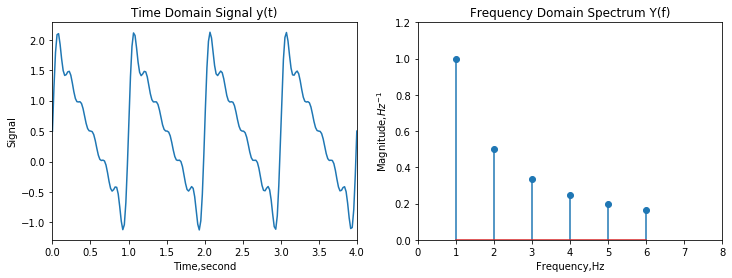

In [11]:
n = np.array(range(1,7)) # n now is frequence, 1,2,3,4,5,6 Hertz

freq = n 
magn = 1/n # magnitude for each frequency component

t = np.linspace(0,4,200)

y = magn[0]*np.sin(2*np.pi*freq[0]*t)+ \
    magn[1]*np.sin(2*np.pi*freq[1]*t)+ \
    magn[2]*np.sin(2*np.pi*freq[2]*t)+ \
    magn[3]*np.sin(2*np.pi*freq[3]*t)+ \
    magn[4]*np.sin(2*np.pi*freq[4]*t)+ \
    magn[5]*np.sin(2*np.pi*freq[5]*t)+0.5

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Time,second')
plt.ylabel('Signal')
plt.title('Time Domain Signal y(t)')
plt.xlim([0,4])

plt.subplot(1,2,2)
plt.stem(freq,magn)
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude,$Hz^{-1}$')
plt.xlim([0,8])
plt.ylim([0,1.2])
plt.title('Frequency Domain Spectrum Y(f)')

you can use a for-loop to generate the time series y(t):

Text(0.5, 1.0, 'Frequency Domain Spectrum Y(f)')

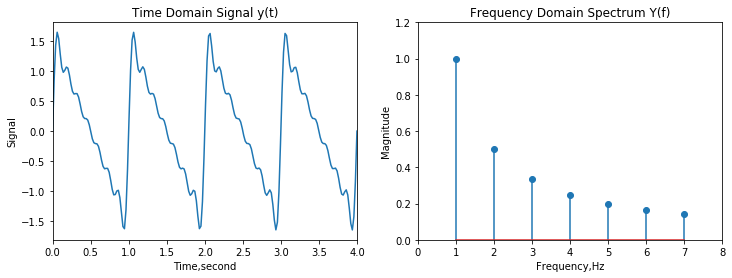

In [13]:
n = np.array(range(1,8))

freq = n
magn = 1/n

t = np.linspace(0,4,200)

# loop over index
y = t*0
for n in range(len(freq)):
    y = y + magn[n]*np.sin(2*np.pi*freq[n]*t)

# loop over freq and magn directly
y = t*0
for f,m in zip(freq,magn):
    y = y + m*np.sin(2*np.pi*f*t)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,y) # time domain y(t)
plt.xlabel('Time,second')
plt.ylabel('Signal')
plt.title('Time Domain Signal y(t)')
plt.xlim([0,4])

plt.subplot(1,2,2)
plt.stem(freq,magn) # Frequency domain F(f)
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude')
plt.xlim([0,8])
plt.ylim([0,1.2])
plt.title('Frequency Domain Spectrum Y(f)')

This example shows that a _sawteeth_ wave is decomposed as a series of $\cos$ functions. In applied mathematics, phyiscs and engineering, this is called a _Fourier_ expansion or _Fourier_ series. 

- According to Fourier, any periodic function $f(t)$ can be represented as the sum of a series of sines and cosines:   

$$f(t)=a_0+ \sum_{r=1}^\infty \bigr[a_r    \cos  \bigr( { {2\pi r}\over{T}}   t\bigr)  + b_r    \sin  \bigr( { {2\pi r}\over{T}}   t\bigl) \bigl]  $$
where $a_r$ and $b_r$ are constants calculated using Fourier integrals.

- You can represent data as a series in time (in the time-domain) as you may have seen a lot OR you can represent the data in terms of frequency, looking for the components magnitude in the data as a function of frequency.  This is known as the _spectrum_. 

There is much more to learn about this that is beyond what we can do here (mostly having to do how you massage the data).  If you are curious, there are some very nice Python wrappers for beautiful code for doing cool state-of-the-art time series analysis. (see, e.g., http://krischer.github.io/mtspec/ for how to install the code and examples of how to use it.)

#### Spectrum and Power Spectrum

_Spectrum_: the magnigude of each wave component as a function of the corresponding frequency is called a **spectrum**, it gives you a sense of the relative magnitudes between different frequency components within a singal.

_Power Spectrum_: the power (or energy density) of each wave component as a function of the corresponding frequency is called a **power spectrum**, it gives you a sense of the power of each freqeuency component with in a signal, which is also known as a **periodogram**

For example in the above case, $y(t)$ is the time-domain signal, $Y(f)$ is the spectrum, and $|Y(f)|^2$ is the power spectrum density:

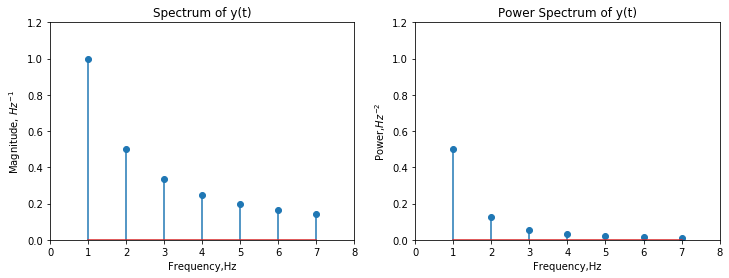

In [14]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.stem(freq,magn) # this is called a frequency spectrum
plt.xlabel('Frequency,Hz')
plt.ylabel('Magnitude, $Hz^{-1}$')
plt.title('Spectrum of y(t)')
plt.ylim([0,1.2])
plt.xlim([0,8])

plt.subplot(1,2,2)
plt.stem(freq,0.5*magn**2) # this is called a power spectrum, aka, periodogram
plt.xlabel('Frequency,Hz')
plt.ylabel('Power,$Hz^{-2}$')
plt.xlim([0,8])
plt.ylim([0,1.2])
plt.title('Power Spectrum of y(t)')

plt.show()

Let's learn some zeroth order analysis that produces a _periodogram_ for a given signal in Python, which is a plot of power versus frequency. We will do this with the minimum of massaging.


Let us take advantage of a **signal.periodogram** function in the **scipy** package.  That module has functions that allow us to  calculate the _power spectral density_ for a time series.  Here's the documentation page of the **signal.periodogram** function in **scipy**: https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html

The sampling frequency is 50.0  Hz


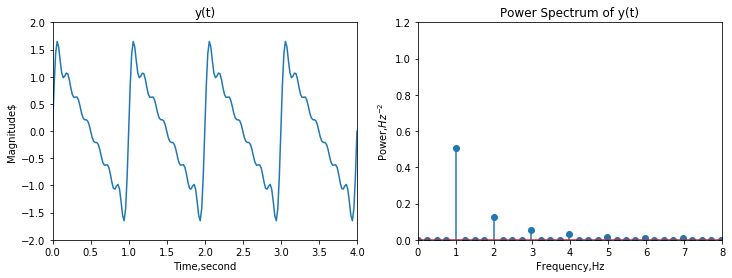

In [23]:
from scipy import signal # import the scipy.signal module

n = np.array(range(1,8)) # frequencies
t = np.linspace(0,4,201) # time domain, 0 to 4 seconds, 200 sampling points

freq = n
magn = 1/n

# loop over freq and magn directly
y = t*0
for f,m in zip(freq,magn):
    y = y + m*np.sin(2*np.pi*f*t)

fs=50 # sampling frequency, why it's 50? -  becasue my time cadency is 0.02 Hz according to the array t!

# an alternative way of computing the sampleing frequency for the periodogram calculation
fs = 1.0/(t[1]-t[0]) # 1/DeltaT, let's use this way to calculate fs in all our future codes
print('The sampling frequency is',fs,' Hz')

freqs,powers=signal.periodogram(y,fs) # compute power spectrum using scipy

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(t,y)
plt.xlabel('Time,second')
plt.ylabel('Magnitude$')
plt.title('y(t)')
plt.ylim([-2,2])
plt.xlim([0,4])

plt.subplot(1,2,2)
plt.stem(freqs,0.25*powers)
plt.xlabel('Frequency,Hz')
plt.ylabel('Power,$Hz^{-2}$')
plt.xlim([0,8])
plt.ylim([0,1.2])
plt.title('Power Spectrum of y(t)')

plt.show()



Now let's look at a very interesting example in Earth sciences - Earth's orbit

#### Earth's orbit - pacemaker of the Ice Ages (credit, Lisa Tauxe, ltauxe@ucsd.edu)

One of the classic problems in Earth Science is: what controlled the coming and going of the great ice sheets.  It has long been  known that there were several, perhaps many, ice ages. In the European Alps, several keen observationalists (among them the German author/poet/gentleman scientist, Goethe), had noticed that Alpine glaciers must have been larger in the past. 

Between 1837 and 1840, a Swiss-American geologist named Jean Louis Agassiz used the moraines, striations, and glacial erratics deposited by moving glaciers as evidence that much of Europe was once covered with a vast ice sheet like that still on Greenland today. That said, the causes of these profound climatic changes remained a mystery.  

In 1920, Milutin Milankovitz  explained the coming and going of ice ages as a response to changes in the Earth's _insolation_ (the amount of energy recieved from the sun). He argued that insolation is controlled by changes in the Earth's orbit around the sun.  This idea has now been widely embraced by the paleoclimate community, largely because of the very strong coherence between  cycles in Earth's orbit and evidence for changes in ice volume using geochemical proxies like oxygen isotopic ratios.  

The orbital cycles can be calculated by knowing the exact configuration of the planets.  Milankovitch famously took the first stab at it from his prison cell during WWI. Nowadays it is calculated with fancy computers.  The key parameters are _eccentricity_ (or ovalness of the orbit around the sun), the _obliquity_ (tilt) of the spin axis and the _precession_ of the spin axis.  

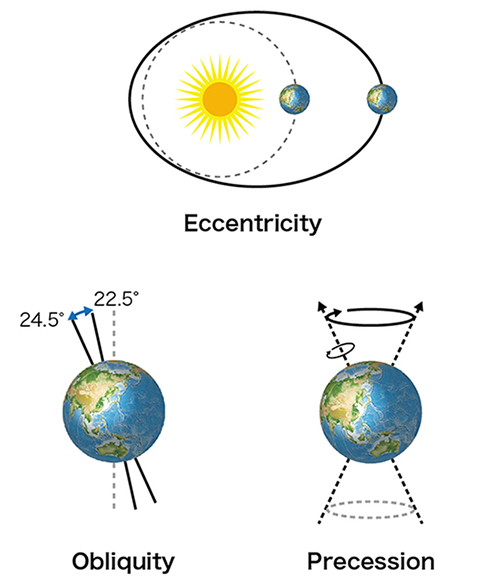

In [63]:
Image(filename='Figures/Milankovitch_Cycles.jpg')

[_Figure from_ http://www.jamstec.go.jp/e/about/press_release/20141027/; _see also_ http://www.sciencecourseware.org/eec/GlobalWarming/Tutorials/Milankovitch/].  

The Earth's orbital parameters of ellipticity, obliquity and precession vary in predictable ways.  One commonly used model for variations in them over the last few hundred million years was published by Laskar et al. (2004; http://dx.doi.org/10.1051/0004-6361:20041335).  

Let's take a look for the behavior of the last few million years using the data file from the Laskar et al. (2004) paper. 



In [25]:
# Read in the datafile into a Pandas DataFrame
cycles=pd.read_csv('../Datasets/INSOLN.LA2004.BTL.100.csv')
print (cycles.columns)
cycles.head()

Index(['Age (ka)', 'Eccentricity', 'Obliquity', 'Precession'], dtype='object')


,Age (ka),Eccentricity,Obliquity,Precession
0,0,0.016702,0.409093,1.796257
1,1,0.017161,0.411353,1.497928
2,2,0.017497,0.413555,1.200024
3,3,0.017846,0.415639,0.903494
4,4,0.018211,0.417555,0.611381


First, we filter the data for the last  million years and then we plot it as a time series.  

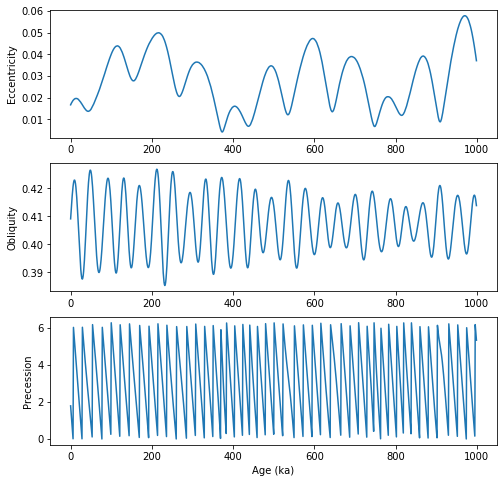

In [28]:
cycles_1Ma=cycles[cycles['Age (ka)']<1000] # only look at last 1000 ka (1 Million).   

# set up the plot as three rows
# start with Eccentricity
fig=plt.figure(1,(8,8)) # make a nice big plot
fig.add_subplot(311) # notice how you do not need the commas!
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Eccentricity'])
plt.ylabel('Eccentricity')

# add obliquity
fig.add_subplot(312)
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Obliquity'])
plt.ylabel('Obliquity')

# add precession
fig.add_subplot(313)
plt.plot(cycles_1Ma['Age (ka)'],cycles_1Ma['Precession'])
plt.ylabel('Precession')
plt.xlabel('Age (ka)');

fs= 1.0


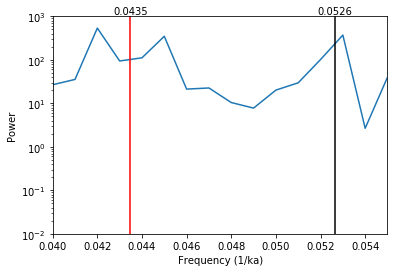

In [31]:
# make an array out of the desired data series
prec=np.array(cycles_1Ma['Precession'])
time = np.array(cycles_1Ma['Age (ka)'])
fs = 1/(time[1]-time[0])

# and calculate the frequencies 
prec_freqs,prec_power=signal.periodogram(prec,fs)
# plot on a linear x, log y plot (using semilogy( ))
plt.semilogy(prec_freqs,prec_power)
plt.ylim(.01,1000) # truncate the Y axis
plt.xlim(.001,.06) # truncate the X axis
# put on the precessional frequencies
plt.axvline(x=1./23.,color='red')  # use a vertical line
plt.axvline(x=1./19.,color='black')
plt.xlabel('Frequency (1/ka)') # label the axes
plt.ylabel('Power')
plt.text(1./23.,1000,'0.0435',ha='center',va='bottom')
plt.text(1./19.,1000,'0.0526',ha='center',va='bottom');
plt.xlim(.04,.055) # truncate the X axis
plt.show()

It is a little rough but you can clearly see the two peaks near 23 and 19 kyr. We could smooth out the diagram by exploring _windowing_ options, but for now, let's just use what the default options are. 

#### Now try to calculate the peaks in Eccentricity and Obliquity in the data set as in-class practices

In [32]:
n = np.array(range(1,8))

freq = n
magn = 1/n

t = np.arange(0,4,0.05)

y = t*0
for n in range(len(freq)):
    y = y+magn[n]*np.sin(2*np.pi*freq[n]*t)
    
1/0.05

20.0